In [36]:
%run imports.ipynb
%run information_conditions.ipynb import Information_Conditions
%run base_ecopg.ipynb import BaseEcologicalPublicGood
%run helper_functions.ipynb import *
%run simulation_and_results_functions.ipynb import *

1. No information: all defect with some margin of error
2. Only State - all coop or all defect (with margin of error)
3. Only action history - coop and defection avg coop - but you see a lot of variation in strategies
4. Both ecological and 

In [2]:
'''ecopgg only social'''

ecopg = BaseEcologicalPublicGood()
information_condition_only_action_history_information = Information_Conditions(ecopg, mode="only_action_history_information")
mae_ecopg = POstratAC_eps(env=information_condition_only_action_history_information, learning_rates=0.05, discount_factors=  0.98)


result_list = run_simulation_across_conditions_with_traj(
    mae = mae_ecopg, 
    mode = "only_action_history_information",
    num_samples = 7, 
    exclude_degraded_state_for_average_cooperation = False
)


# print(result_list[0]["xtraj"])



7 samples, seed 41, 2nd result

In [3]:
result_list_sliced = result_list[2:3]

print("result_list_sliced", result_list_sliced)

result_list_sliced [{'avg_coop': Array(2.5800273e-06, dtype=float32), 'time_to_reach': 21951, 'xtraj': array([[[[2.96018689e-01, 7.03981311e-01],
         [9.91645361e-01, 8.35463947e-03],
         [1.76425454e-01, 8.23574546e-01],
         [1.20350700e-01, 8.79649300e-01]],

        [[5.31779677e-01, 4.68220323e-01],
         [3.45194240e-01, 6.54805760e-01],
         [6.02943301e-01, 3.97056699e-01],
         [2.60941992e-01, 7.39058008e-01]]],


       [[[2.95710951e-01, 7.04289019e-01],
         [9.91631746e-01, 8.36822763e-03],
         [1.76222026e-01, 8.23777974e-01],
         [1.20170549e-01, 8.79829466e-01]],

        [[5.31371593e-01, 4.68628347e-01],
         [3.44501644e-01, 6.55498385e-01],
         [6.02612257e-01, 3.97387713e-01],
         [2.60700464e-01, 7.39299536e-01]]],


       [[[2.95403421e-01, 7.04596519e-01],
         [9.91618156e-01, 8.38186312e-03],
         [1.76019013e-01, 8.23981047e-01],
         [1.19990468e-01, 8.80009592e-01]],

        [[5.30964255e-0

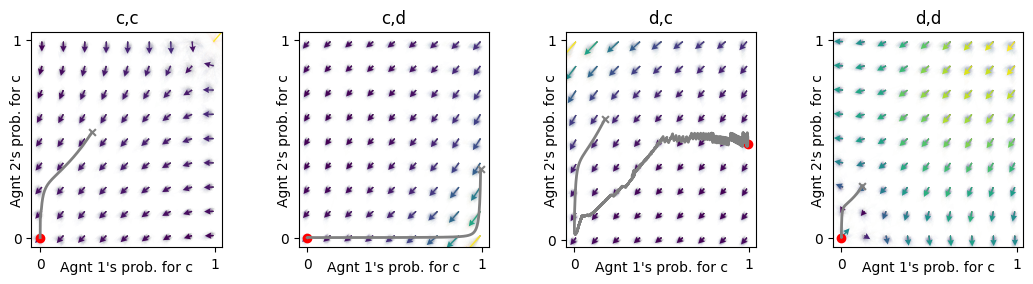

In [4]:
make_plots(information_condition_only_action_history_information, mae_ecopg, result_list_sliced)


In [5]:
anamolous_array = result_list_sliced[0]["xtraj"]

anamolous_array.shape

# for i in range(0, anamolous_array.shape[0]):
#     for j in range(0, anamolous_array.shape[1]):
#         anamlous_traj = anamolous_array[i, 1, 2, 0]

print(anamolous_array[0])
np.save("anamolous_full_policy_trajectory.npy", anamolous_array)
np.save("anamolous_full_policy_starting_point.npy", anamolous_array[0])


[[[0.29601869 0.70398131]
  [0.99164536 0.00835464]
  [0.17642545 0.82357455]
  [0.1203507  0.8796493 ]]

 [[0.53177968 0.46822032]
  [0.34519424 0.65480576]
  [0.6029433  0.3970567 ]
  [0.26094199 0.73905801]]]


In [6]:
anamolous_array = result_list_sliced[0]["xtraj"]


In [7]:
obsdist_trajectory = np.array([mae_ecopg.obsdist(anamolous_array[i]) for i in range(len(anamolous_array))])
statedist_trajectory = np.array([mae_ecopg.Ps(anamolous_array[i]) for i in range(len(anamolous_array))])

print("obsdist_trajectory", np.array(obsdist_trajectory).shape)

obsdist_trajectory (21951, 2, 4)


In [8]:
anamolous_trajectory = anamolous_array[:, 1, 2, 0]

In [9]:
np.set_printoptions(precision=10, suppress=True, linewidth=300)

In [10]:
# print(anamolous_array[21940:21950, 1, 1, 0])


# print(anamolous_array[:, 1, 1, 0].argmin())
# print(anamolous_trajectory.argmin())

# print(obsdist_trajectory[7684, :])


# print(statedist_trajectory[7684, :])

# print(information_condition_only_action_history_information.Sset)

policy_at_min_point = anamolous_array[7683, :, :, :]
state_dist_at_min_point = mae_ecopg.Ps(policy_at_min_point)
obsdist_at_min_point = mae_ecopg.obsdist(policy_at_min_point)[0]

print("state", state_dist_at_min_point)
print("obsdist", obsdist_at_min_point)

print("-"*(50))
Biso = mae_ecopg._bios(policy_at_min_point, state_dist_at_min_point)[0]

print(Biso)

state [0.0000009927 0.0000000051 0.0000461943 0.0000002356 0.004973096  0.0000251835 0.98999196   0.004962266 ]
obsdist [0.0000009988 0.0000464302 0.0049982793 0.9949543   ]
--------------------------------------------------
[[0.9949147    0.005085314  0.           0.           0.           0.           0.           0.          ]
 [0.           0.           0.9949267    0.0050732465 0.           0.           0.           0.          ]
 [0.           0.           0.           0.           0.99496156   0.0050384426 0.           0.          ]
 [0.           0.           0.           0.           0.           0.           0.9950126    0.004987431 ]]


at 7684, the Bileif of onsevring c,c given c, c, p cahnges to 0.5. (instead of 1). Because P(s) artifically bumped by an epsilon when zero. (why should bios sum to 1)

In [12]:

fig = go.Figure()

fig.add_trace(go.Scatter(y=anamolous_array[:, 1, 0, 0], mode='lines', name='C, C', line = dict(color='blue')))
fig.add_trace(go.Scatter(y=anamolous_array[:, 1, 1, 0], mode='lines', name='C, D', line = dict(color='red')))
fig.add_trace(go.Scatter(y=anamolous_array[:, 1, 2, 0], mode='lines', name='D, C', line = dict(color='green')))
fig.add_trace(go.Scatter(y=anamolous_array[:, 1, 3, 0], mode='lines', name='D, D', line = dict(color='orange')))

fig.add_trace(go.Scatter(y=obsdist_trajectory[:, 0], mode='lines', name= 'Obsdist C, C', line = dict(color = 'blue', dash='dash')))
fig.add_trace(go.Scatter(y=obsdist_trajectory[:, 1], mode='lines', name= 'Obsdist C,D', line = dict(color='red', dash='dash')))
fig.add_trace(go.Scatter(y=obsdist_trajectory[:, 2], mode='lines', name= 'Obsdist D,C', line = dict(color='green', dash='dash')))
fig.add_trace(go.Scatter(y=obsdist_trajectory[:, 3], mode='lines', name= 'Obsdist D,D', line = dict(color='orange', dash='dash')))



fig.update_layout(
    title=" Trajectories (agent 2)",
    xaxis_title="Time Steps",
    yaxis_title="C",
    hovermode="x",
    template="plotly_white",
    width=1000,
    height=500
)

fig.show()


IndexError: index 2 is out of bounds for axis 1 with size 2

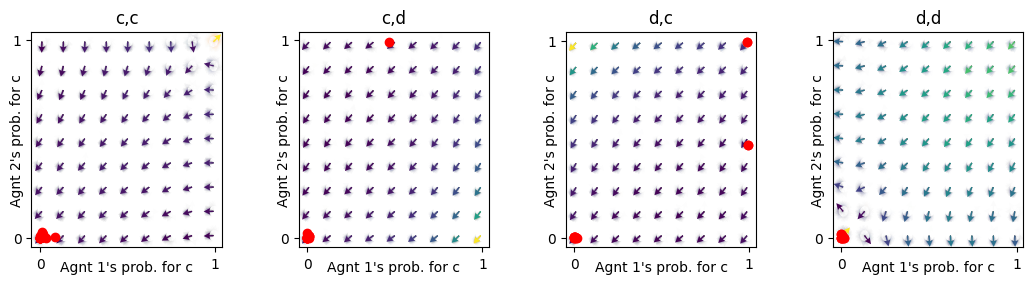

In [13]:
information_condition_only_action_history_information = Information_Conditions(ecopg, mode="only_action_history_information")
mae_ecopg = POstratAC_eps(env=information_condition_only_action_history_information, learning_rates=0.05, discount_factors=  0.98)


result_list = run_simulation_across_conditions_with_traj(
    mae = mae_ecopg, 
    mode = "only_action_history_information",
    num_samples = 15, 
    exclude_degraded_state_for_average_cooperation = False
)

make_plots_only_final_point(information_condition_only_action_history_information, mae_ecopg, result_list)


In [ ]:
'''ecopgg only social'''

ecopg = BaseEcologicalPublicGood()
information_condition_both_state_and_action = Information_Conditions(ecopg, mode="both_state_and_action_information")
mae_ecopg_both_state_and_action = POstratAC_eps(env=information_condition_both_state_and_action, learning_rates=0.05, discount_factors=  0.96)


result_list_both_state_and_action = run_simulation_across_conditions_with_traj(
    mae = mae_ecopg_both_state_and_action, 
    mode = "both_state_and_action_information",
    num_samples = 100, 
    exclude_degraded_state_for_average_cooperation = False
)



In [15]:
final_point_list = [x["final_point"] for x in result_list_both_state_and_action]
final_point_list_zero_deg = [make_degraded_state_cooperation_probablity_zero(x, information_condition_both_state_and_action.Oset[0]) for x in final_point_list]
rounded = [np.round(arr, 2) for arr in final_point_list_zero_deg]
print(len(get_unique_arrays(rounded)))


6


TypeError: get_unique_arrays() missing 1 required positional argument: 'list_of_arrays'

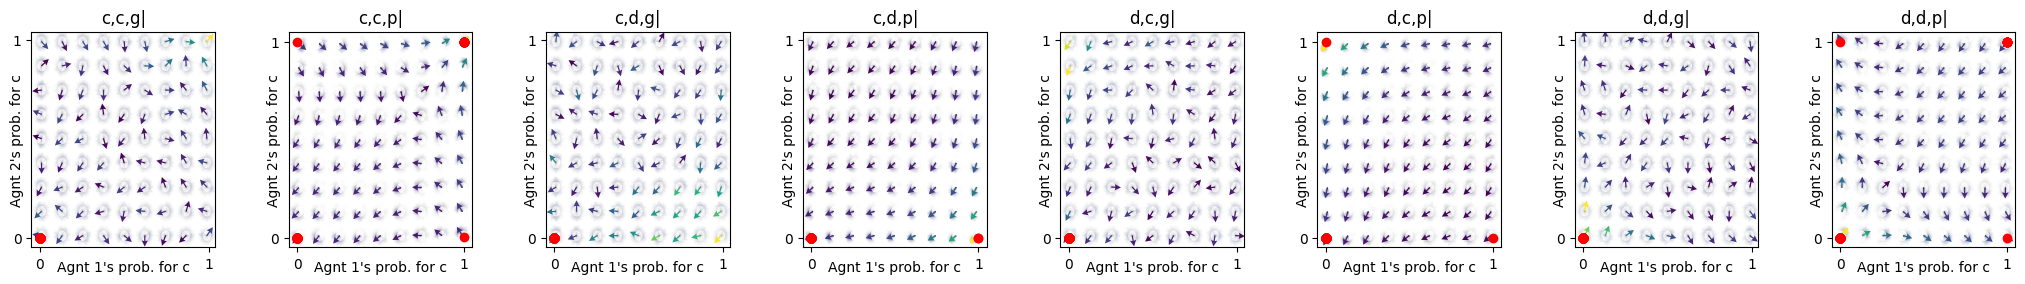

In [16]:
make_plots_only_final_point(information_condition_both_state_and_action, mae_ecopg_both_state_and_action, result_list_both_state_and_action)


get_unique_arrays()

In [ ]:
'''ecopgg only social'''

ecopg = BaseEcologicalPublicGood()
information_condition_both_state_and_action = Information_Conditions(ecopg, mode="both_state_and_action_information")
mae_ecopg_both_state_and_action = POstratAC_eps(env=information_condition_both_state_and_action, learning_rates=0.05, discount_factors=  0.96)


result_list_both_state_and_action = run_simulation_across_conditions_with_traj(
    mae = mae_ecopg_both_state_and_action, 
    mode = "both_state_and_action_information",
    num_samples = 100, 
    exclude_degraded_state_for_average_cooperation = False
)

final_point_list = [x["final_point"] for x in result_list_both_state_and_action]
final_point_list_zero_deg = [make_degraded_state_cooperation_probablity_zero(x, information_condition_both_state_and_action.Oset[0]) for x in final_point_list]
final_point_list_zero_deg_round_2 = [np.round(arr, 2) for arr in final_point_list_zero_deg]

In [40]:
strategy_frequencies = enumerate_strategies_frequency(final_point_list_zero_deg_round_2)
strategy_frequencies.to_csv('strategies.csv', index=False)
